<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_7_Predict_Fasshion_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
fashion_df_train = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/fashion-mnist_train.csv")
fashion_df_test = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/fashion-mnist_test.csv")

In [30]:
fashion_df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [31]:
fashion_df_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
fashion_df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [33]:
# 0     : T-shirts/top
# 1     : Trouser
# 2     : pullover
# 3     : Dress
# 4     : Coat
# 5     : Sandal
# 6     : Shirt
# 7     : Sneakers
# 8     : Bag
# 9     : Ankie boot

In [34]:
training = np.array(fashion_df_train, dtype=np.float32)
testing = np.array(fashion_df_test, dtype=np.float32)

In [35]:
training.shape

(60000, 785)

In [36]:
testing.shape

(10000, 785)

In [37]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
np.array(training[400, 1:].reshape(28,28))

array([[  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,  12.,  98.,
        129.,  24.,   8.,  25., 119., 155.,  33.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  32., 147., 201., 168.,
        207., 217., 255., 219., 218., 175., 189., 191., 120.,  17.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  91., 146., 160., 166., 160., 160.,
        153., 169., 184., 180., 155., 155., 162., 163., 170., 167., 121.,
         66.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 100., 175., 154., 154., 152., 154., 153.,
        159., 150., 148., 147., 155., 157., 155., 149., 154., 154., 161.,
        177.,  97.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 177., 149., 148., 149., 149., 150., 147.,
        138., 135., 140., 139., 136., 145., 153., 156., 150., 149., 153.,
        153., 194.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  15., 193

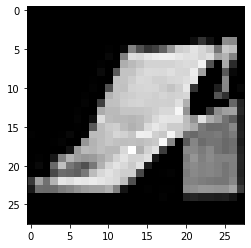

In [39]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28), cmap="gray")

In [40]:
label = training[i,0]
label

5.0

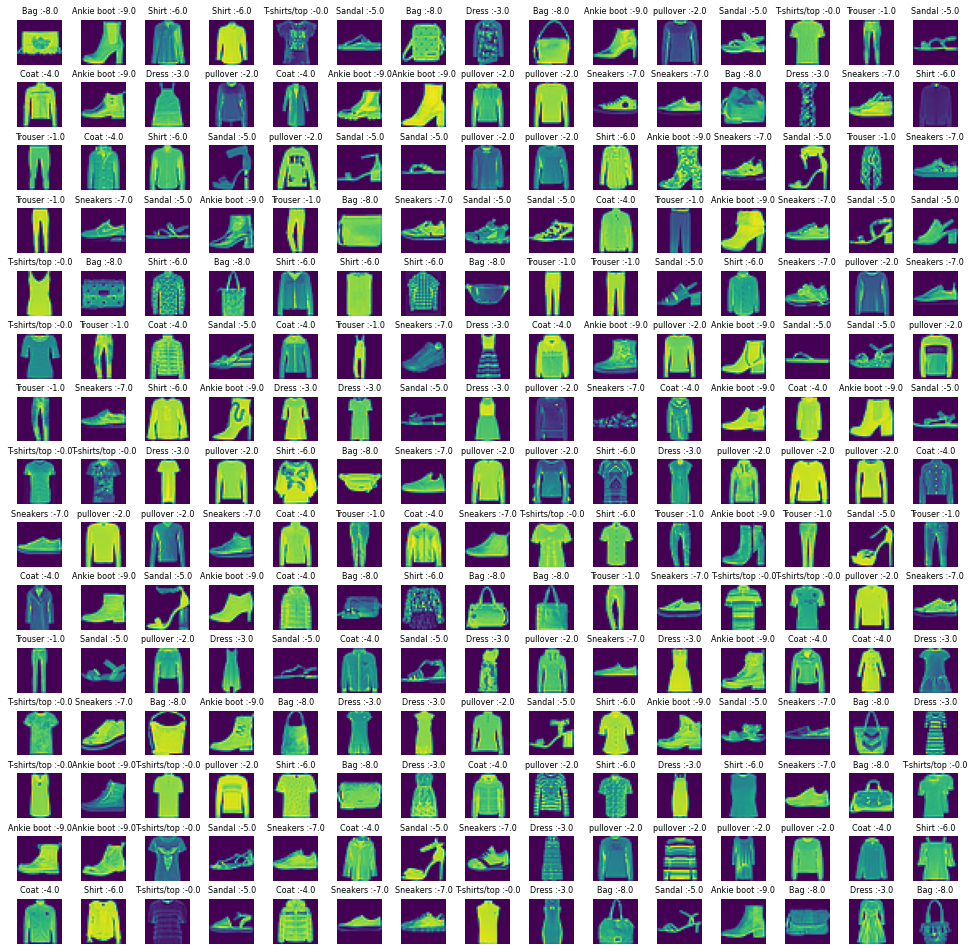

In [41]:
name_list = ["T-shirts/top", "Trouser", "pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankie boot"]

# image in grid format 
# diamensiond of grid
w_grid = 15
l_grid = 15
# axes to use object plot in specific figure various locations
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17)) 
# flatten the 15*15 matrix in 255 array
axes = axes.ravel()
n_training = len(training)
# selecting random number from training set
for i in np.arange(0, w_grid*l_grid):
    index = random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    # creating plot title based index name id
    name  = str(name_list[int(training[index, 0])])+" :-" + str(training[index, 0])
    axes[i].set_title(name, fontsize=8)
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

In [42]:
x_train = training[:, 1:]/255 # expect first its target label
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
y_train = training[:,0]
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [44]:
x_test = testing[:, 1:]/255 # expect first its target label /255 will normalize data 
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [45]:
y_test = testing[:,0]
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [46]:
x_train.shape

(60000, 784)

In [47]:
y_train.shape

(60000,)

In [48]:
x_train = x_train.reshape(x_train.shape[0], * (28,28, 1))
x_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [49]:
x_test = x_test.reshape(x_test.shape[0], * (28,28, 1))
x_test

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [50]:
x_train.shape

(60000, 28, 28, 1)

In [51]:
x_test.shape

(10000, 28, 28, 1)

In [52]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation="relu" ))
cnn.add(layers.MaxPooling2D(2,2)) 


cnn.add(layers.Conv2D(64, (3,3), activation="relu"))

cnn.add(layers.Flatten())

In [53]:
cnn.add(layers.Dense(64, activation="relu"))
# we have 10 category so out put must have 10 class
cnn.add(layers.Dense(10, activation="softmax"))

In [54]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [55]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [56]:
epochs_hist = cnn.fit(x_train, y_train, batch_size=512, epochs=150)

Epoch 1/150
118/118 [==============================] - 42s 355ms/step - loss: 0.8660 - accuracy: 0.6947
Epoch 2/150
118/118 [==============================] - 42s 357ms/step - loss: 0.4904 - accuracy: 0.8175
Epoch 3/150
118/118 [==============================] - 45s 384ms/step - loss: 0.4110 - accuracy: 0.8532
Epoch 4/150
118/118 [==============================] - 42s 359ms/step - loss: 0.3682 - accuracy: 0.8692
Epoch 5/150
118/118 [==============================] - 43s 363ms/step - loss: 0.3388 - accuracy: 0.8791
Epoch 6/150
118/118 [==============================] - 42s 358ms/step - loss: 0.3213 - accuracy: 0.8855
Epoch 7/150
118/118 [==============================] - 42s 359ms/step - loss: 0.3058 - accuracy: 0.8920
Epoch 8/150
118/118 [==============================] - 42s 358ms/step - loss: 0.2934 - accuracy: 0.8941
Epoch 9/150
118/118 [==============================] - 42s 360ms/step - loss: 0.2822 - accuracy: 0.8991
Epoch 10/150
118/118 [==============================] - 43s 363m

In [57]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.7641 - accuracy: 0.9063


In [58]:
predict_classes = cnn.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


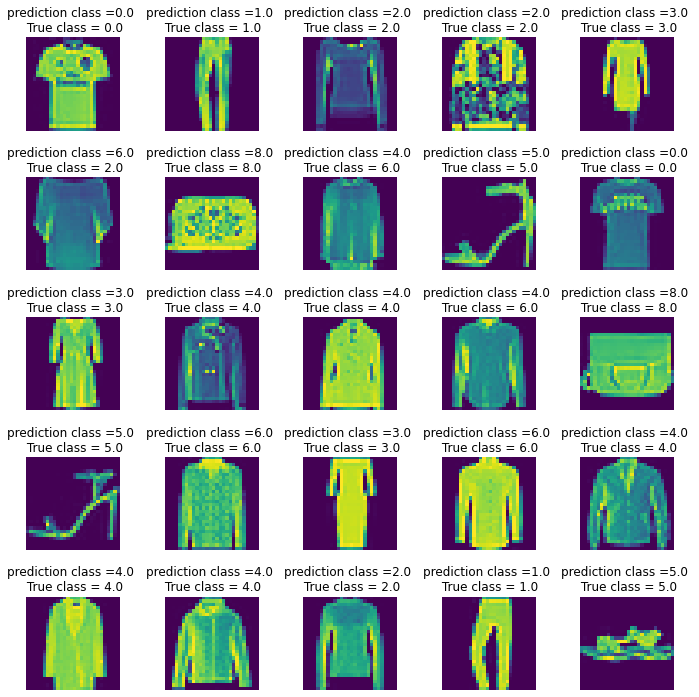

In [70]:
l = 5
w = 5
fig, axes = plt.subplots(l, w, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("prediction class ={:0.1f} \n True class = {:0.1f}". format(predict_classes[i], y_test[i]))
    axes[i].axis("off")


plt.subplots_adjust(hspace=0.5)

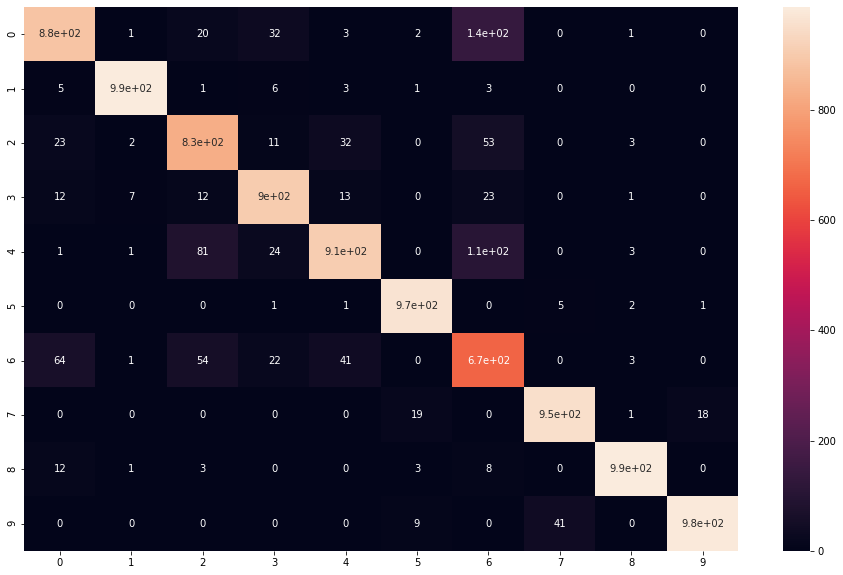

In [76]:
plt.figure(figsize=(16,10))
confusion_matrixs = confusion_matrix(predict_classes, y_test)
sns.heatmap(confusion_matrixs, annot=True)

In [81]:
number_of_class = 10
target =['class {}'.format(i) for i in range(number_of_class)]
print(classification_report(y_test, predict_classes, target_names=target))

              precision    recall  f1-score   support

     class 0       0.82      0.88      0.85      1000
     class 1       0.98      0.99      0.98      1000
     class 2       0.87      0.83      0.85      1000
     class 3       0.93      0.90      0.92      1000
     class 4       0.81      0.91      0.85      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.78      0.67      0.72      1000
     class 7       0.96      0.95      0.96      1000
     class 8       0.97      0.99      0.98      1000
     class 9       0.95      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

